In [93]:
import numpy as np
import pandas as pd

In [94]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,Class,DiffAccX,DiffAccY
0,0.000000,0.000000,NORMAL,0.000000,0.000000
1,-1.624864,-1.082492,NORMAL,-1.624864,-1.082492
2,-0.594660,-0.122410,NORMAL,1.030204,0.960082
3,0.738478,-0.228456,NORMAL,1.333138,-0.106046
4,0.101741,0.777568,NORMAL,-0.636737,1.006023
...,...,...,...,...,...
3411,0.915688,-2.017489,SLOW,2.374675,-1.824629
3412,-1.934203,0.914925,SLOW,-2.849891,2.932414
3413,-0.222845,0.747304,SLOW,1.711359,-0.167621
3414,-0.349423,0.067261,SLOW,-0.126579,-0.680043


In [95]:
df_training.isna().sum()

AccX        0
AccY        0
Class       0
DiffAccX    0
DiffAccY    0
dtype: int64

## Change categories to numbers

In [96]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,Class,DiffAccX,DiffAccY
0,0.000000,0.000000,0,0.000000,0.000000
1,-1.624864,-1.082492,0,-1.624864,-1.082492
2,-0.594660,-0.122410,0,1.030204,0.960082
3,0.738478,-0.228456,0,1.333138,-0.106046
4,0.101741,0.777568,0,-0.636737,1.006023
...,...,...,...,...,...
3411,0.915688,-2.017489,2,2.374675,-1.824629
3412,-1.934203,0.914925,2,-2.849891,2.932414
3413,-0.222845,0.747304,2,1.711359,-0.167621
3414,-0.349423,0.067261,2,-0.126579,-0.680043


## Normalize the data

In [97]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

,AccX,AccY,DiffAccX,DiffAccY,Class
0,-2.090819,8.424269,0.012037,-0.012577,0
1,-195.187234,-134.475048,-166.006943,-114.501443,0
2,-72.759319,-7.735009,105.272186,101.529709,0
3,85.668834,-21.734057,136.224200,-11.228412,0
4,9.999939,111.070663,-65.045995,106.388643,0
...,...,...,...,...,...
3411,106.728131,-257.903714,242.642233,-192.992960,2
3412,-231.948681,129.203106,-291.172960,310.131807,2
3413,-28.573341,107.075511,174.868553,-17.740887,2
3414,-43.615750,17.303333,-12.921013,-71.936747,2


In [98]:
X_test = df_test.drop(columns="Class")
X_test = (X_test - X_test.mean()) / X_test.std() * 100

X_test["Class"] = df_test["Class"]
X_test

,AccX,AccY,DiffAccX,DiffAccY,Class
0,67.345100,-9.509000,-0.021340,-0.012385,1
1,57.982946,10.303100,-8.494392,16.758078,1
2,270.452050,-824.010358,192.270076,-706.238535,1
3,229.805029,-828.171460,-36.808209,-3.534656,1
4,283.133326,-732.402479,48.242495,81.053740,1
...,...,...,...,...,...
3079,-84.712435,-57.627689,-73.609489,-1.097380,2
3080,145.444037,51.068429,208.277716,91.996249,2
3081,121.268079,-177.287100,-21.901364,-193.309813,2
3082,83.265000,79.069807,-34.415357,216.987532,2


## Train model

In [99]:
X_training  = X_train.drop(columns="Class")
y_training  = X_train.Class

X_testing = X_test.drop(columns="Class")
y_testing = X_test.Class

In [100]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [2, 1, 1e-2, 1e-4, 1e-5, 1e-7, 1e-8, 1e-9, 1e-10, 1e-12]}

gnb_gscv = GridSearchCV(gnb, param_grid, cv=5, n_jobs=10)
gnb_gscv.fit(X_training, y_training)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=10,
             param_grid={'var_smoothing': [2, 1, 0.01, 0.0001, 1e-05, 1e-07,
                                           1e-08, 1e-09, 1e-10, 1e-12]})

In [102]:
gnb_gscv.best_params_

{'var_smoothing': 0.01}

In [103]:
gnb_gscv.best_score_

0.40280881559682513

In [104]:
gnb_gscv.score(X_training, y_training)

0.4162763466042155

In [105]:
gnb_gscv.score(X_testing, y_testing)

0.46206225680933855

In [106]:
classes = ["NORMAL", "AGGRESIVE", "SLOW"]

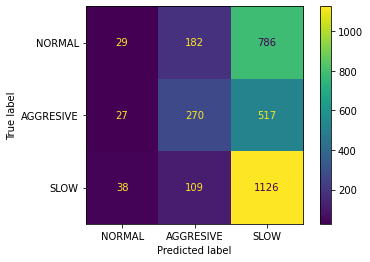

In [107]:
y_pred = gnb_gscv.predict(X_testing)

CM = confusion_matrix(y_testing, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

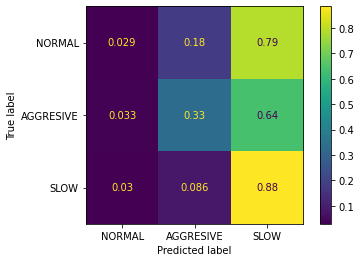

In [108]:
CM_norm = confusion_matrix(y_testing, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()